# SMARTCART -- E-commerce Customer Segmentation System

In [115]:
import pandas as pd
pd.set_option('display.max_columns',None)

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from kneed import KneeLocator
from sklearn.cluster import AgglomerativeClustering

import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv("smartcart_customers.csv")

In [93]:
data = df.copy()
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0


# Feature Engerring

In [ ]:
# fill na
data["Income"] = data["Income"].fillna(data["Income"].mean())

In [15]:
# Age
data["Age"] = 2026 - data["Year_Birth"]

In [27]:
# Customer Tenure
data["Dt_Customer"] = pd.to_datetime(data["Dt_Customer"],dayfirst=True)

last_date = data["Dt_Customer"].max()

data["C_Tenure"] = (last_date - data["Dt_Customer"]).dt.days

In [33]:
# Tot_spending

data["Tot_spend"] = (data["MntWines"] + data["MntFruits"] + data["MntMeatProducts"] + data["MntFishProducts"] + data["MntSweetProducts"] + data["MntGoldProds"])

In [49]:
# Tot children
data["Tot_child"] = data["Teenhome"] + data["Kidhome"]

In [47]:
# Education
data["Education"] = data["Education"].replace({
    "Graduation": "Graduates", "PhD": "Graduates",
    "Master": "Masters",
    "2n Cycle": "UG", "Basic": "UG"
})

In [45]:
# Marital status

data["Marital_Status"] = data["Marital_Status"].replace({
    "Married": "Together", "Together": "Together",
    "Single": "Single", "Divorced": "Single", "Widow": "Single", "Alone": "Single", "Absurd":"Single", "YOLO": "Single"
})
data["Marital_Status"].value_counts()

Marital_Status
Together    1444
Single       796
Name: count, dtype: int64

In [50]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Age,C_Tenure,Tot_spend,Tot_child
0,5524,1957,Graduates,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,1,69,663,1617,0
1,2174,1954,Graduates,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,72,113,27,2
2,4141,1965,Graduates,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,61,312,776,0
3,6182,1984,Graduates,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,42,139,53,1
4,5324,1981,Graduates,Together,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,45,161,422,1


# Drop Features

In [51]:
data = data.drop(columns = ["ID","Year_Birth","Dt_Customer","Kidhome","Teenhome"])

In [55]:
cols = ["MntWines",	"MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds"]

data = data.drop(cols, axis=1)

In [56]:
data_cleaned = data.copy()

In [60]:
data_cleaned.head()

,Education,Marital_Status,Income,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Age,C_Tenure,Tot_spend,Tot_child
0,Graduates,Single,58138.0,58,3,8,10,4,7,0,1,69,663,1617,0
1,Graduates,Single,46344.0,38,2,1,1,2,5,0,0,72,113,27,2
2,Graduates,Together,71613.0,26,1,8,2,10,4,0,0,61,312,776,0
3,Graduates,Together,26646.0,26,2,2,0,4,6,0,0,42,139,53,1
4,Graduates,Together,58293.0,94,5,5,3,6,5,0,0,45,161,422,1


# Outliers

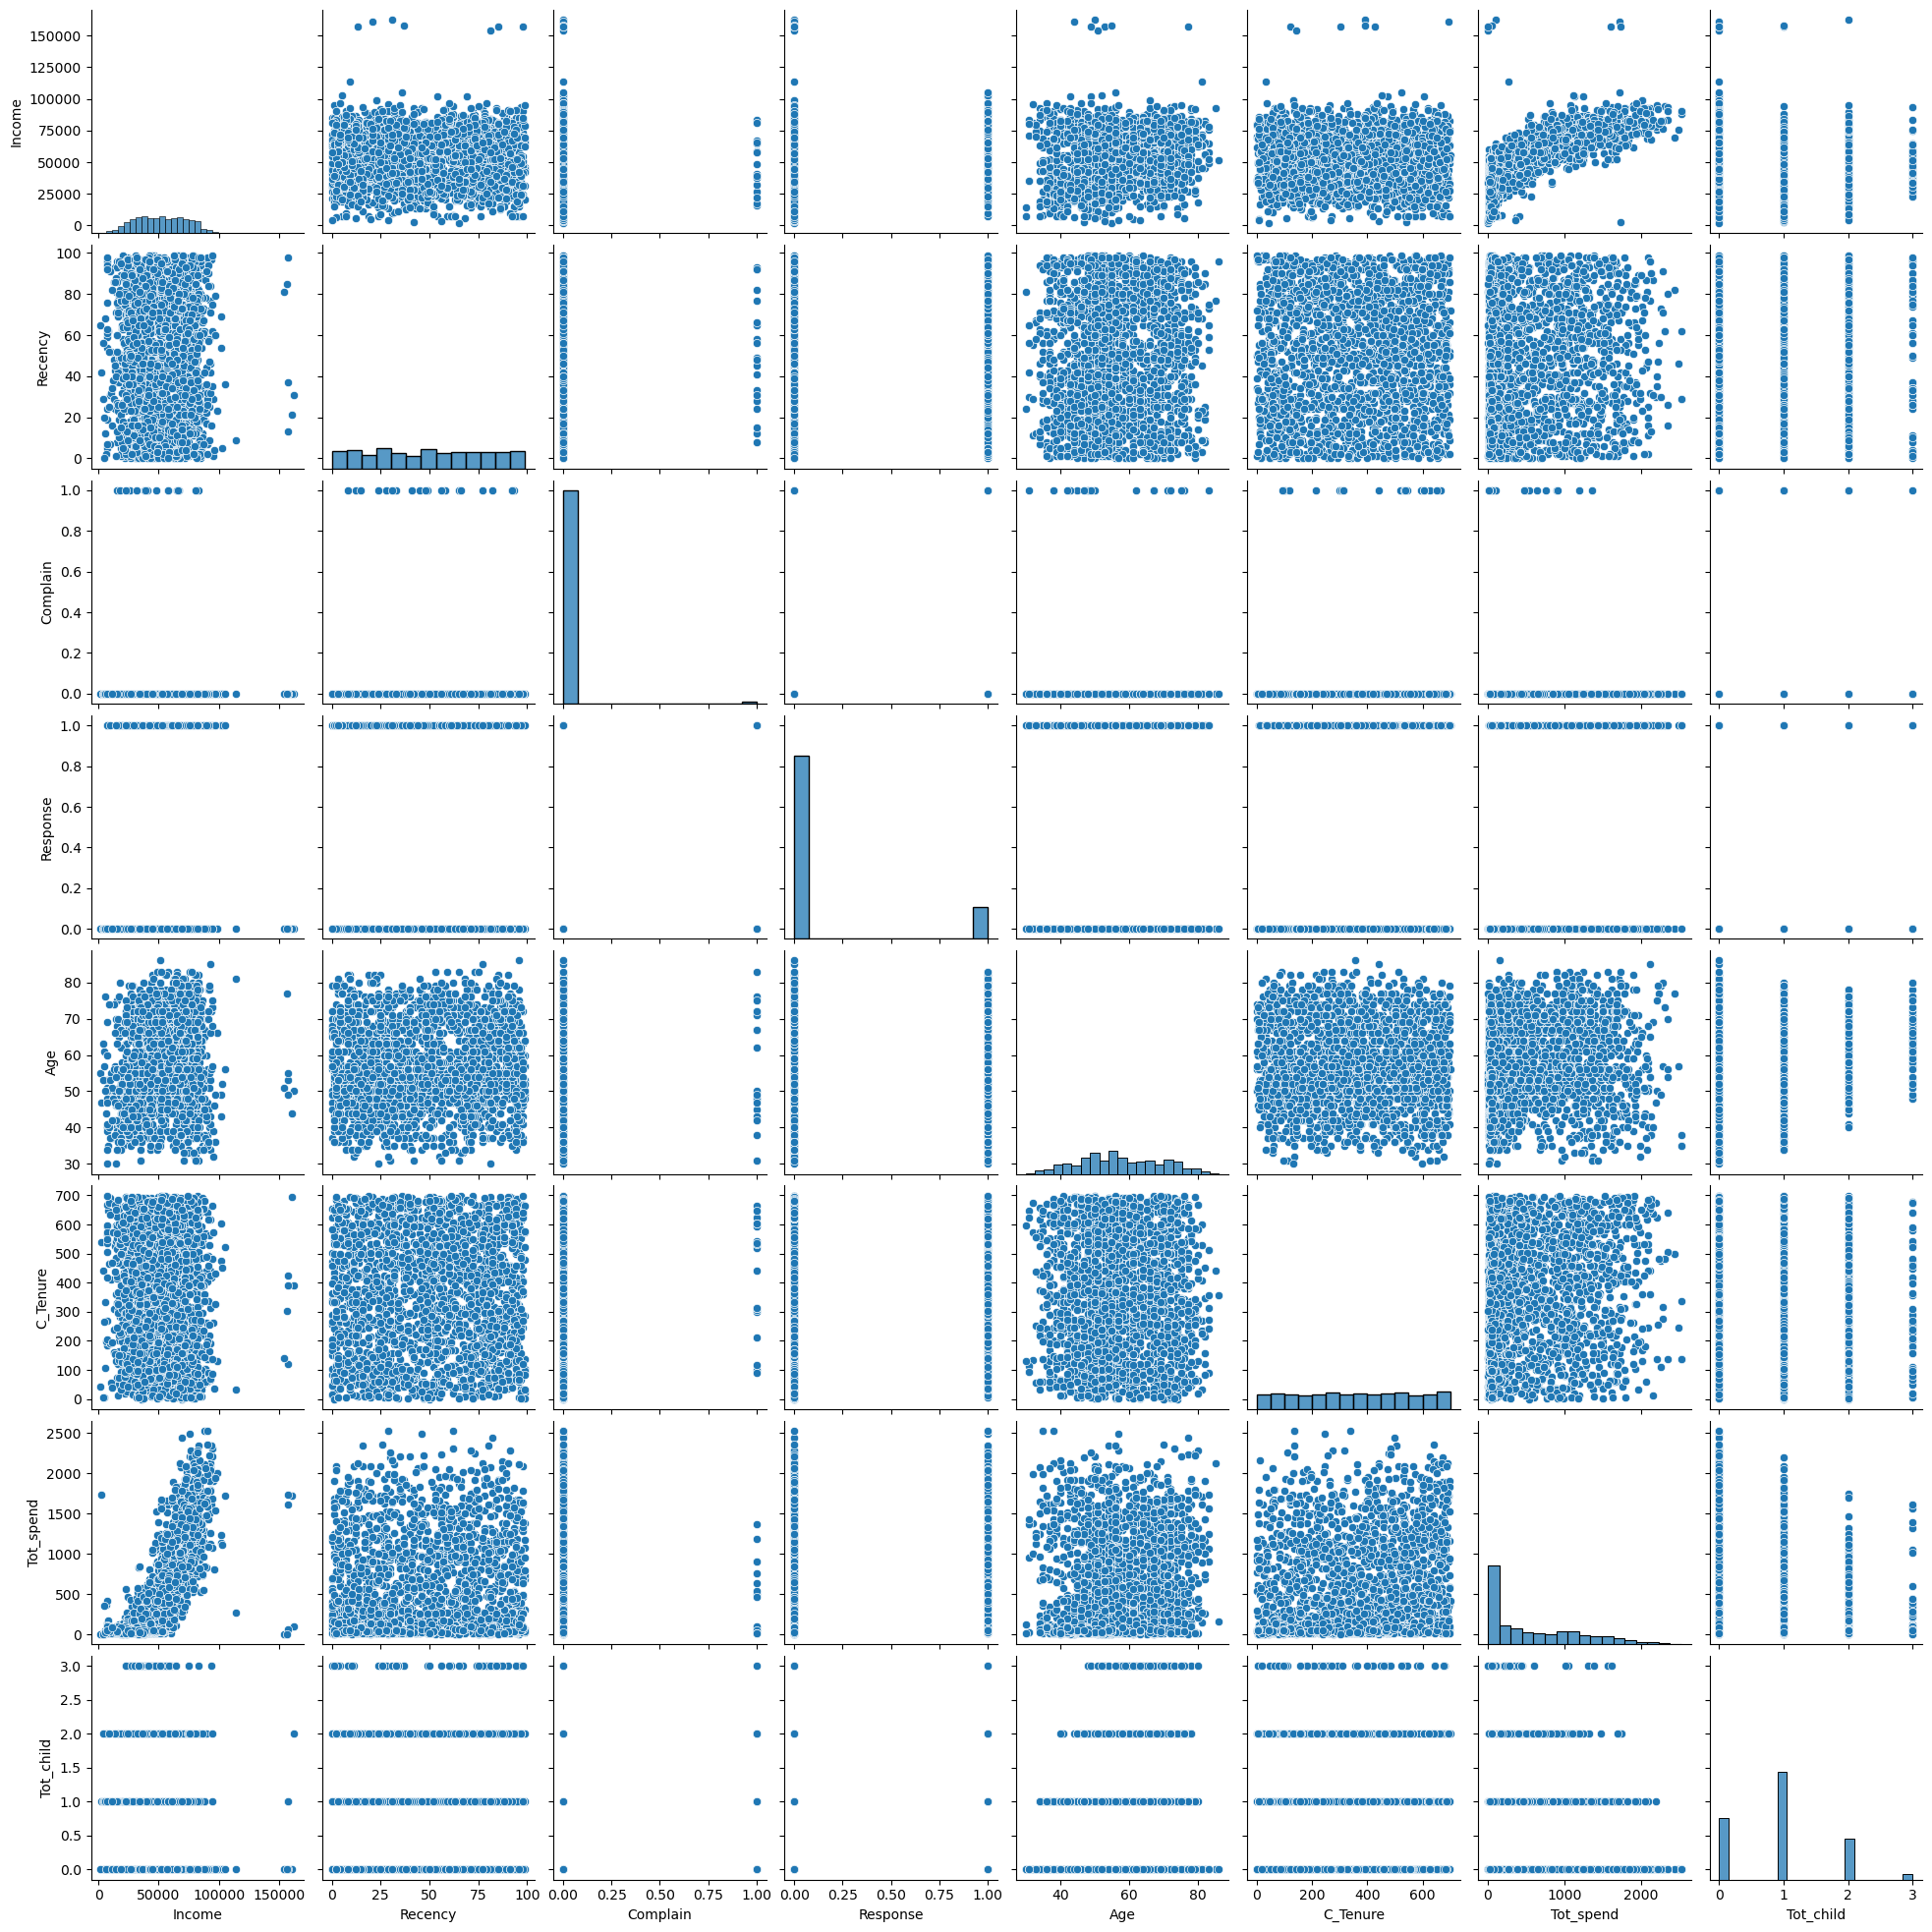

In [75]:
cols = ["Income", "Recency","Complain", "Response", "Age", "C_Tenure", "Tot_spend", "Tot_child"]

sns.pairplot(data_cleaned[cols])

In [76]:
# Outliers removing
data_cleaned = data_cleaned[(data_cleaned["Income"]<600_000)]
data_cleaned = data_cleaned[(data_cleaned["Age"]<90)]

# Heatmap

<Axes: >

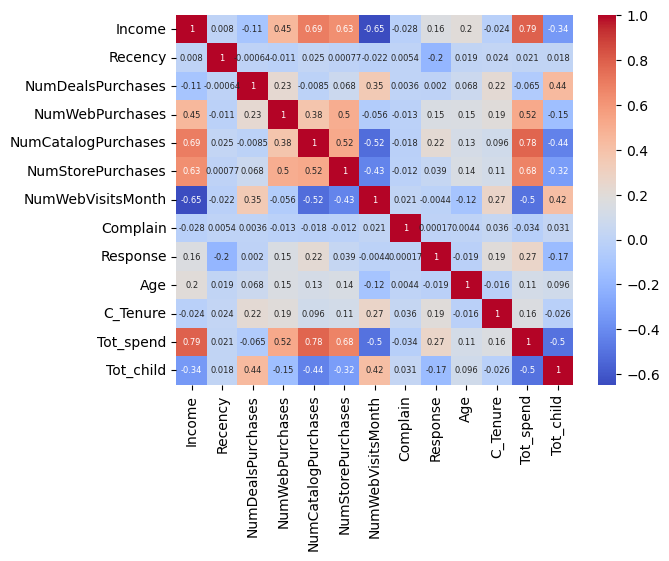

In [80]:
# cols = ["Income", "Recency", "NumDealsPurchases", "NumWebPurchases", "NumCatalogPurchases", "NumStorePurchases", "NumWebVisitsMonth", "Complain", "Response", "Age", "C_Tenure", "Tot_spend", "Tot_child"]
corr = data_cleaned.corr(numeric_only=True)

sns.heatmap(
    corr,
    annot = True,
    annot_kws = {"size":6},
    cmap = "coolwarm"
)

# One Hot Encoding

In [83]:
ohe = OneHotEncoder()

cat_cols = ["Education", "Marital_Status"]
encoded_cols = ohe.fit_transform(data_cleaned[cat_cols])

In [84]:
encod_df = pd.DataFrame(
    encoded_cols.toarray(),
    columns = ohe.get_feature_names_out(cat_cols),
    index = data_cleaned.index
)

In [87]:
df_encod = pd.concat([data_cleaned.drop(cat_cols,axis=1), encod_df], axis=1)

In [90]:
df_encod.head()

,Income,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Age,C_Tenure,Tot_spend,Tot_child,Education_Graduates,Education_Masters,Education_UG,Marital_Status_Single,Marital_Status_Together
0,58138.0,58,3,8,10,4,7,0,1,69,663,1617,0,1.0,0.0,0.0,1.0,0.0
1,46344.0,38,2,1,1,2,5,0,0,72,113,27,2,1.0,0.0,0.0,1.0,0.0
2,71613.0,26,1,8,2,10,4,0,0,61,312,776,0,1.0,0.0,0.0,0.0,1.0
3,26646.0,26,2,2,0,4,6,0,0,42,139,53,1,1.0,0.0,0.0,0.0,1.0
4,58293.0,94,5,5,3,6,5,0,0,45,161,422,1,1.0,0.0,0.0,0.0,1.0


In [94]:
X = df_encod

# Scaling

In [95]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Visualization

In [98]:
pca = PCA(n_components = 3)
X_pca = pca.fit_transform(X_scaled)

In [99]:
pca.explained_variance_ratio_

array([0.2320002 , 0.11419287, 0.10454924])

Text(0.5, 0.92, '3d projection')

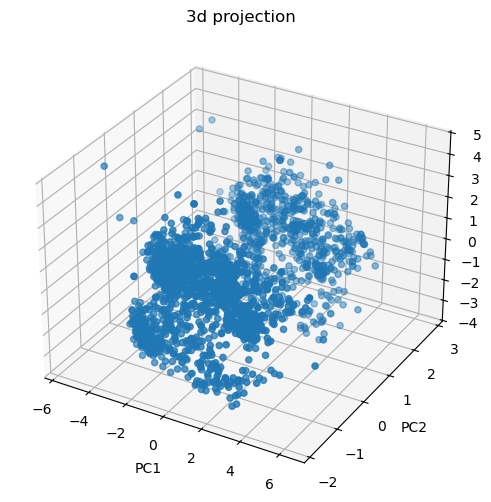

In [100]:
fig = plt.figure(figsize=(8,6))

ax = fig.add_subplot(111,projection="3d")

ax.scatter(X_pca[:,0], X_pca[:,1],X_pca[:,2])

ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.set_title("3d projection")

# Clustering

## K means

In [106]:
# Elbow method
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters = k, random_state=42)
    kmeans.fit_predict(X_pca)
    wcss.append(kmeans.inertia_)

In [108]:
#knee locator
knee = KneeLocator(range(1,11),wcss, curve="convex", direction="decreasing")
print("best k = ",knee.elbow)

best k =  4


In [109]:
# kmeans
means = KMeans(n_clusters = 4, random_state=42)
k_labels = kmeans.fit_predict(X_pca)

Text(0.5, 0.92, '3d projection')

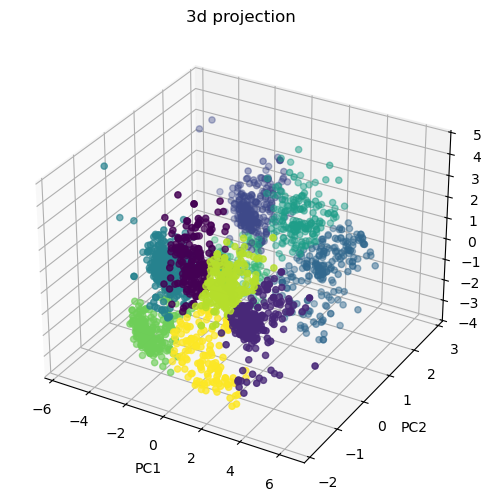

In [119]:
fig = plt.figure(figsize=(8,6))

ax = fig.add_subplot(111,projection="3d")

ax.scatter(X_pca[:,0], X_pca[:,1],X_pca[:,2], c = k_labels)

ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.set_title("3d projection")

# AgglomerativeClustering

In [116]:
agg_cls = AgglomerativeClustering(n_clusters=4, linkage="ward")
agg_labels = agg_cls.fit_predict(X_pca)

Text(0.5, 0.92, '3d projection')

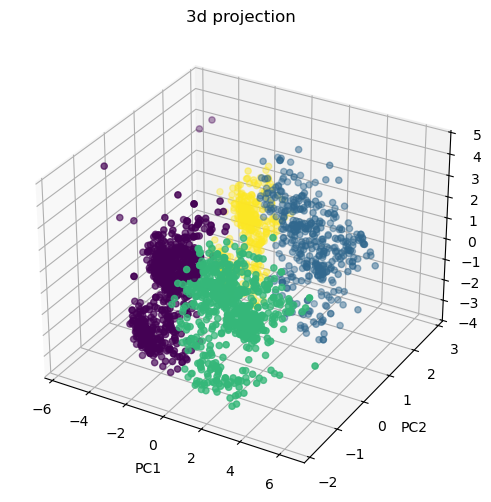

In [120]:
fig = plt.figure(figsize=(8,6))

ax = fig.add_subplot(111, projection="3d")

ax.scatter(X_pca[:,0],X_pca[:,1],X_pca[:,2], c=agg_labels)

ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.set_title("3d projection")

# Characterization of clusters

In [122]:
df_encod["clusters"] = agg_labels

In [124]:
df_encod.head()

,Income,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Age,C_Tenure,Tot_spend,Tot_child,Education_Graduates,Education_Masters,Education_UG,Marital_Status_Single,Marital_Status_Together,clusters
0,58138.0,58,3,8,10,4,7,0,1,69,663,1617,0,1.0,0.0,0.0,1.0,0.0,1
1,46344.0,38,2,1,1,2,5,0,0,72,113,27,2,1.0,0.0,0.0,1.0,0.0,3
2,71613.0,26,1,8,2,10,4,0,0,61,312,776,0,1.0,0.0,0.0,0.0,1.0,2
3,26646.0,26,2,2,0,4,6,0,0,42,139,53,1,1.0,0.0,0.0,0.0,1.0,0
4,58293.0,94,5,5,3,6,5,0,0,45,161,422,1,1.0,0.0,0.0,0.0,1.0,0


<Axes: xlabel='clusters', ylabel='count'>

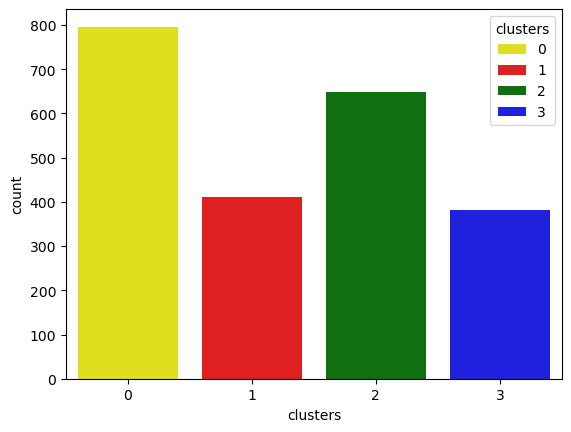

In [126]:
pal = ["yellow","red","green","blue"]

sns.countplot(x=df_encod["clusters"], palette=pal, hue=df_encod["clusters"])

<Axes: xlabel='Tot_spend', ylabel='Income'>

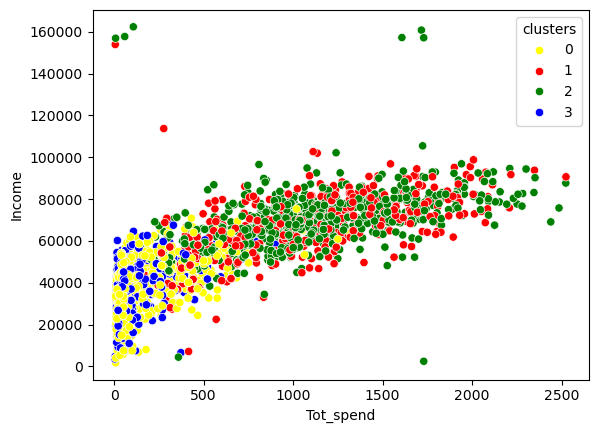

In [128]:
sns.scatterplot(x=df_encod["Tot_spend"], y=df_encod["Income"], hue=df_encod["clusters"], palette=pal)

In [132]:
#cluster summary
summary  = df_encod.groupby("clusters").mean()
print(summary)

                Income    Recency  NumDealsPurchases  NumWebPurchases  \
clusters                                                                
0         36883.130983  48.913317           2.611809         2.788945   
1         67455.061452  49.221411           2.274939         5.761557   
2         70169.826014  49.239198           2.100309         5.666667   
3         35784.181776  49.217848           2.167979         2.309711   

          NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  Complain  \
clusters                                                                        
0                    0.752513           3.709799           6.604271  0.008794   
1                    4.586375           8.075426           4.214112  0.007299   
2                    4.961420           8.367284           3.797840  0.009259   
3                    0.671916           3.320210           6.412073  0.010499   

          Response        Age    C_Tenure    Tot_spend  Tot_child  \
clust

# Flow